In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load dataset
data = load_boston()

# Create dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


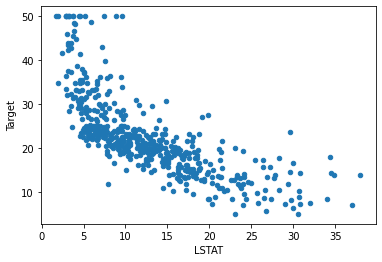

In [7]:
# Split data table into data X and class labels y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Select 1 feature
idx = 12
X = X[:, idx].reshape(-1, 1)

# Plot data
plt.scatter(X, y, s=20)
plt.xlabel(data.feature_names[idx])
plt.ylabel("Target")
plt.show()

In [8]:
# Split data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 1), (152, 1), (354,), (152,))

In [11]:
# Standardize features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
(X_train.mean(), X_train.std()), (X_test.mean(), X_test.std())

((1.6308360813702865e-17, 1.0), (0.10003754989944, 1.027132047450774))

## Linear regression

In [ ]:
# Train model
reg = LinearRegression().fit(X_train_sel, y_train)

# Make train and test predictions
y_train_pred = reg.predict(X_train_sel)
y_test_pred = reg.predict(X_test_sel)

In [ ]:
# Show training and test MSE
(mean_squared_error(y_train, y_train_pred),
 mean_squared_error(y_test,y_test_pred))

In [ ]:
# Show training and test R2
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

## Polynomial regression

In [ ]:
def plot_train_test_poly_mse(X_train, X_test, y_train, y_test, y_train_pred,
                             y_test_pred):
    """Plot training and test MSE trends for multiple regressions side by side.
        
    Parameter
    ---------
        X_train : ndarray of shape (n_samples, n_features)
            Training features.
        X_train : ndarray of shape (n_samples, n_features)
            Test features.   
        y_train : ndarray of shape (n_samples,)
            Training labels.
        y_test : ndarray of shape (n_samples,)
            Test labels.
        y_train_pred : dict
            Predicted training labels for all regressions.
        y_test_pred : dict
            Predicted test labels for all regressions.
    """
    mse_train, mse_test = [], []
    degrees = list(y_train_pred.keys())
    for d in degrees:
        mse_train.append(mean_squared_error(y_train, y_train_pred[d]))
        mse_test.append(mean_squared_error(y_test, y_test_pred[d]))
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8.5, 3))
    axs[0].set(title="Training", xlabel="Polynomial degree", ylabel="MSE")
    axs[1].set(title="Test", xlabel="Polynomial degree", ylabel="MSE")
    axs[0].plot(degrees, mse_train)
    axs[1].plot(degrees, mse_test)
    fig.tight_layout()
    plt.show()

In [ ]:
def train_test_pred_poly(X_train, X_test, y_train, y_test, max_degree, model):
    """Compute train and test predictions for increasing polynomial degree.
    
    Parameter
    ---------
        X_train : ndarray of shape (n_samples, n_features)
            Training features.
        X_train : ndarray of shape (n_samples, n_features)
            Test features.   
        y_train : ndarray of shape (n_samples,)
            Training labels.
        y_test : ndarray of shape (n_samples,)
            Test labels.
        max_degree : int
            Maximum polynomial degree.
        model
            Regression model.
            
    Return
    ------
        y_train_pred : dict
            Predicted training labels for all regressions.
        y_test_pred : dict
            Predicted test labels for all regressions.
    """
    y_train_pred, y_test_pred = {}, {}
    for d in range(1, max_degree + 1):
        poly = PolynomialFeatures(degree=d, include_bias=False).fit(X_train_sel)
        X_train_poly = poly.transform(X_train_sel)
        X_test_poly = poly.transform(X_test_sel)
        model.fit(X_train_poly, y_train)
        y_train_pred[d] = model.predict(X_train_poly)
        y_test_pred[d] = model.predict(X_test_poly)
    return y_train_pred, y_test_pred

In [ ]:
# Compute train and test predictions for increasing polynomial degree
y_train_pred, y_test_pred = train_test_pred_poly(
    X_train, X_test, y_train, y_test, 10, LinearRegression())
    
# Plot MSE trends
plot_train_test_poly_mse(X_train, X_test, y_train, y_test, y_train_pred,
                         y_test_pred)

## Regularized regression

In [ ]:
# Compute train and test predictions for increasing polynomial degree for Ridge
y_train_pred, y_test_pred = train_test_pred_poly(
    X_train, X_test, y_train, y_test, 10, Ridge(alpha=0.5))

# Plot MSE trends
plot_train_test_poly_mse(X_train, X_test, y_train, y_test, y_train_pred,
                         y_test_pred)